# AirBnb NYC EDA

#### Packages and Data Imports

In [48]:
# Import packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

dfnyc = pd.read_csv('/workspaces/gustavolima-ML-template/data/raw/AB_NYC_2019.csv')
dfnyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Data Exploration and Cleaning

#### Data Information (Shape, info, etc...)

In [49]:
# Shape check of our DF
dfnyc.shape

(48895, 16)

Our dataframe, contains 48,895 records (rows) a 16 categories (columns)

In [50]:
# Info check of our DF

dfnyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From the DF Info we see that we have some NaN records, in the biggest one being "last_review" and "reviews_per_month". 

In terms of types of Data we have:

* 8 Categorical Characteristics (id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type, availability_365)
* 8 Numerical Characteristics (latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count )

#### Data Cleaning

In [51]:
# Check for Duplicates in our DF

print(f'The number of duplicated Name records is:', dfnyc['name'].duplicated().sum())
print(f'The number of duplicated Host ID records is:', dfnyc['host_id'].duplicated().sum())
print(f'The number of duplicated ID records is:', dfnyc['id'].duplicated().sum())

The number of duplicated Name records is: 989
The number of duplicated Host ID records is: 11438
The number of duplicated ID records is: 0


* Host_Id can have duplicates, because some home owners have multiple airbnbs registered
* Name has duplicated values, which is odd, but duplicates can exist, since people can put the same names eg. "House in Brooklyn"
* There are 0 duplicated ID, which means it should be all unique records

In [52]:
# Remove useless columns for Modelling

dropcolumns = ['id', 'name', 'host_name', 'last_review', 'reviews_per_month']
dfnyc.drop(dropcolumns, axis=1, inplace=True)
dfnyc.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


### Analyzing Univariate Variables of the DF

#### Analzying Categorial Variables

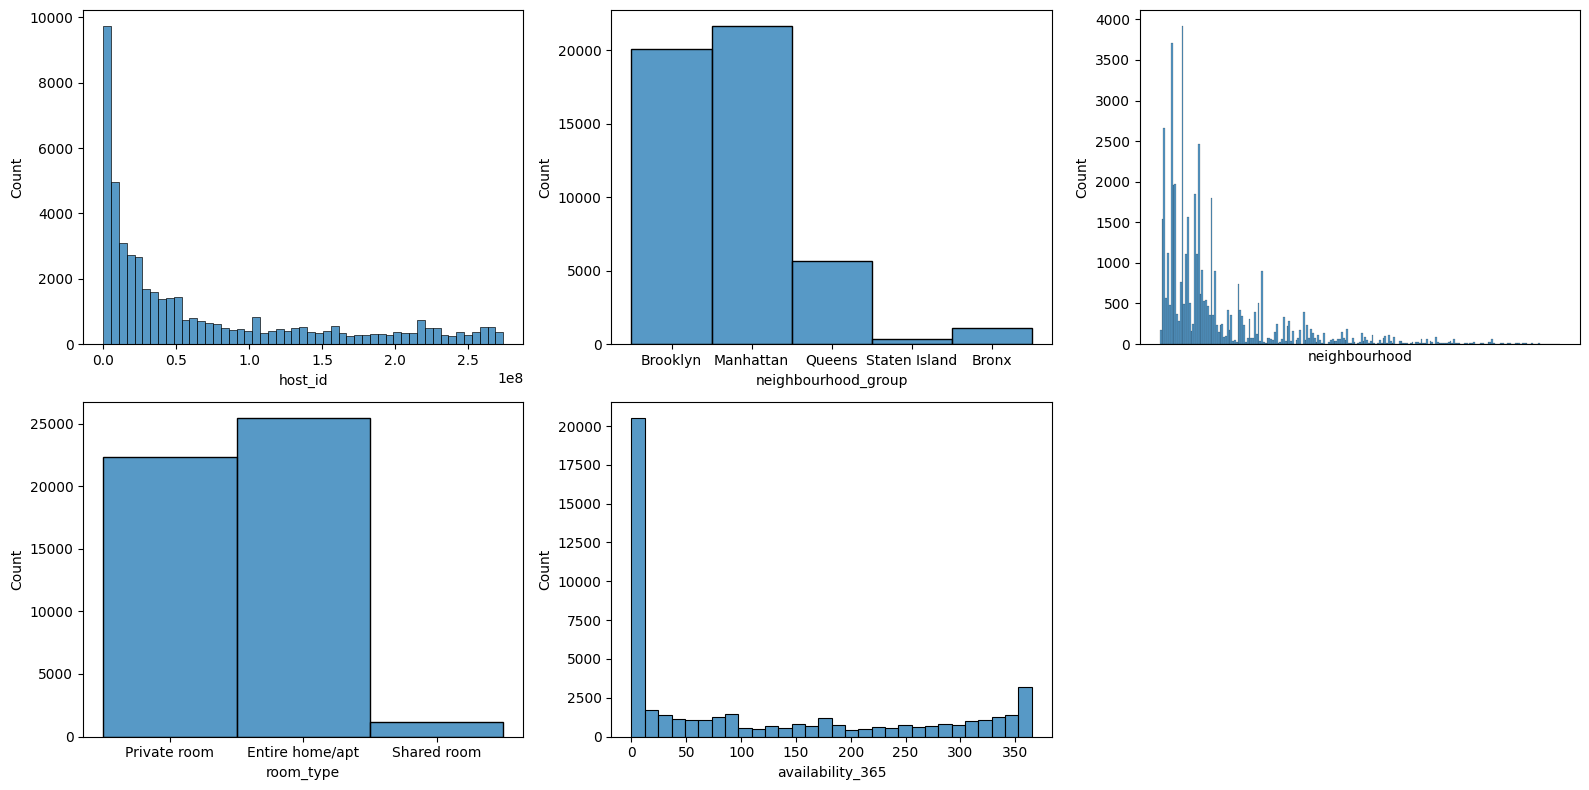

In [53]:
# Plot Histograms of the Categorial Data

# Create plot canvas
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

# Create Histogram
sns.histplot(ax=axes[0,0], data=dfnyc, x='host_id')
sns.histplot(ax=axes[0,1], data=dfnyc, x='neighbourhood_group')
sns.histplot(ax=axes[0,2], data=dfnyc, x='neighbourhood').set_xticks([])
sns.histplot(ax=axes[1,0], data=dfnyc, x='room_type')
sns.histplot(ax=axes[1,1], data=dfnyc, x='availability_365')
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

We can observe the following from the Histogram: 

* There are multiple Hosts with many rooms to rent. But there's also a lot of NaN for the Host_Id
* In our dataset we only have 5 areas, Brooklyn, Manhattan, Queens, Staten Island and Bronx, the 5 Boroughs, which confirms that we are really only analzying New York City.
* Some neighbourhoods obviously have more offers of airbnb rooms than others. 
* There are more Entire Homes / Apts to rent than Private Rooms. And Shared Rooms is the least available type of rooms
* The majority of the rooms ara available 365 days per year, but in our dataset, there's a lot of 0 / NaN for this category, which has to be mistake / lack of information

#### Analzying Nuemric Variables

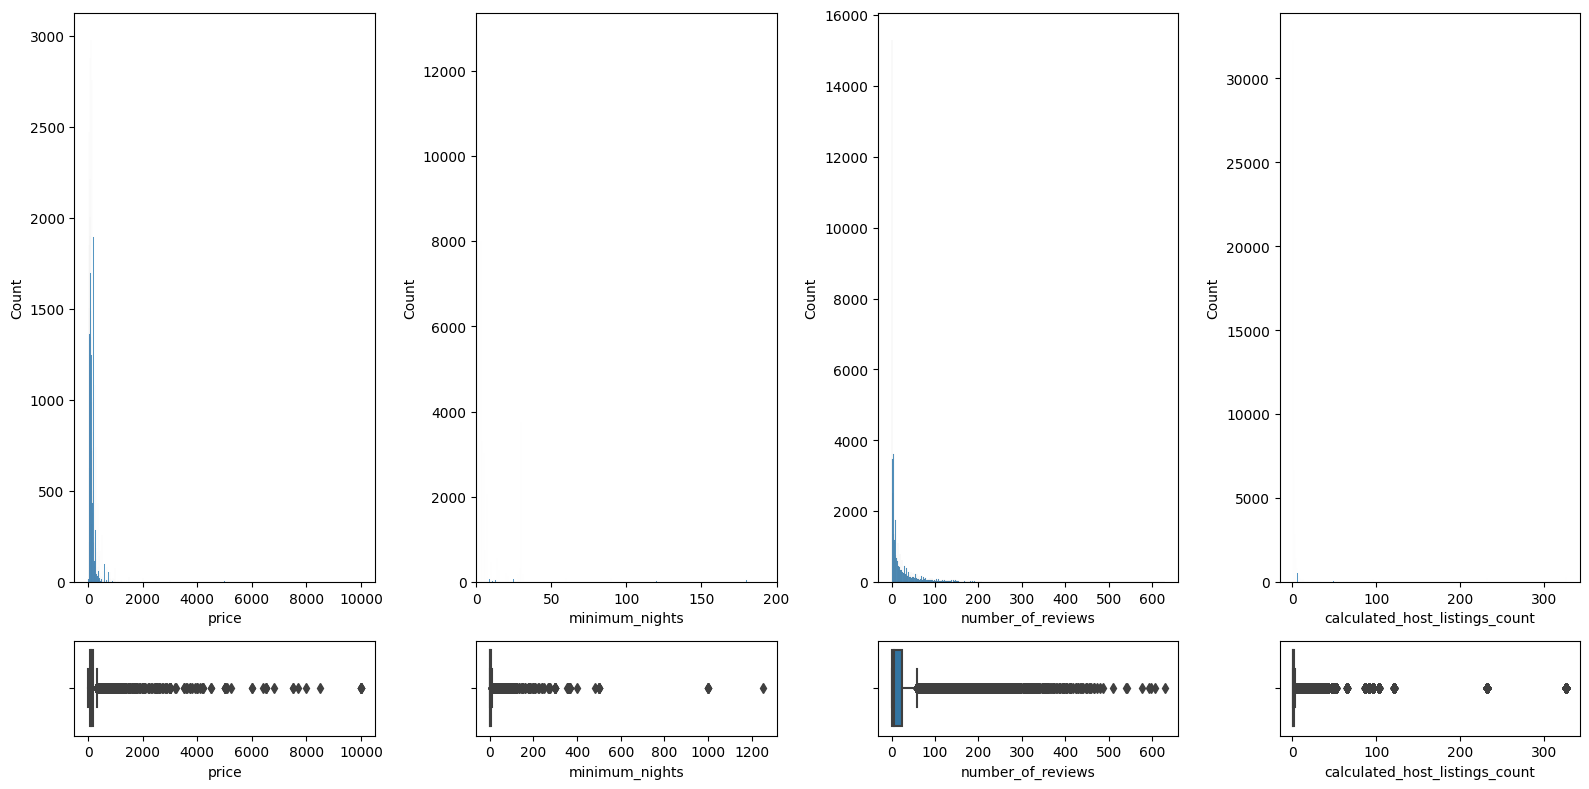

In [54]:
# Plot Histograms of the Categorial Data

# Join Lat and Long in 1 column, Coordinates
# dfnyc['coordinates'] = dfnyc['latitude'].astype(str) + ', ' + dfnyc['longitude'].astype(str)

# Create plot canvas
fig, axes = plt.subplots(2, 4, figsize=(16, 8), gridspec_kw={'height_ratios': [6, 1]})

# Create Histogram
# sns.histplot(ax=axes[0,0], data=dfnyc, x='coordinates')
# sns.boxplot(ax=axes[1,0], data=dfnyc, x='coordinates')

sns.histplot(ax=axes[0,0], data=dfnyc, x='price')
sns.boxplot(ax=axes[1,0], data=dfnyc, x='price')

sns.histplot(ax=axes[0,1], data=dfnyc, x='minimum_nights').set_xlim(0, 200)
sns.boxplot(ax=axes[1,1], data=dfnyc, x='minimum_nights')

sns.histplot(ax=axes[0,2], data=dfnyc, x='number_of_reviews')
sns.boxplot(ax=axes[1,2], data=dfnyc, x='number_of_reviews')

sns.histplot(ax=axes[0,3], data=dfnyc, x='calculated_host_listings_count')
sns.boxplot(ax=axes[1,3], data=dfnyc, x='calculated_host_listings_count')


# fig.delaxes(axes[3, 0], axes[3,1], axes[3,2])  calculated_host_listings_count

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Analyzing Multivariate Variables of the DF

#### Analyzing Numerical - Numerical

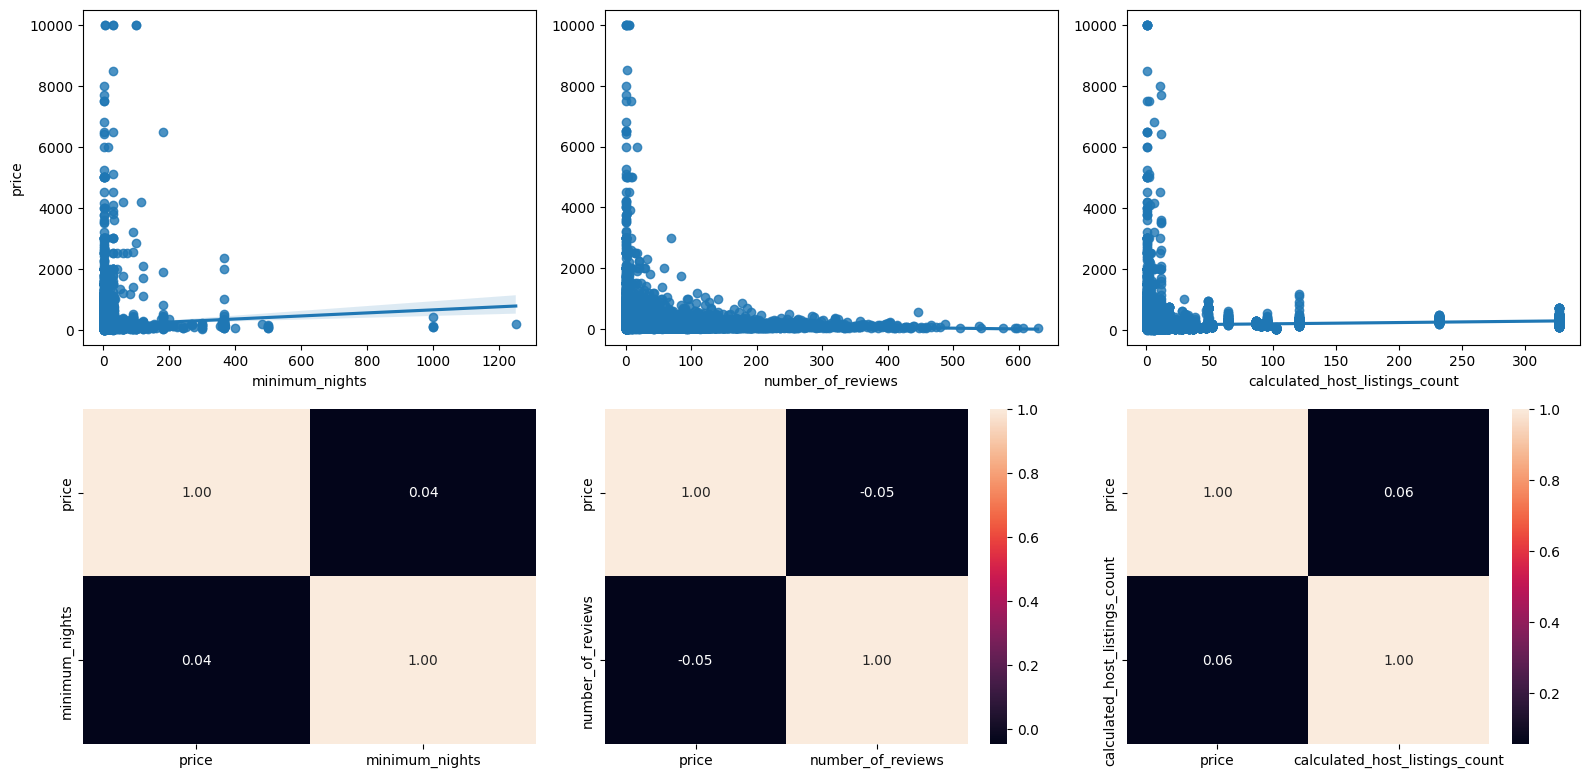

In [55]:
# Numerical - Numerical Analysis

# Create subplot canvas
fig, axis = plt.subplots(2, 3, figsize=(16, 8))

# Create Plates 
# sampled_data = dataframe.sample(50)
sns.regplot(ax=axis[0, 0], data=dfnyc, x="minimum_nights", y="price")
sns.heatmap(dfnyc[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(ax=axis[0, 1], data=dfnyc, x="number_of_reviews", y="price").set(ylabel=None)
sns.heatmap(dfnyc[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

sns.regplot(ax=axis[0, 2], data=dfnyc, x="calculated_host_listings_count", y="price").set(ylabel=None)
sns.heatmap(dfnyc[["price", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", ax=axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Looking at Numerical - Numerical relationships, 
We see that by the correlation values:

* there's no relation between the price and minimum nights
* there's no relation between the number of reviews and the price

#### Categorical - Categorical Analysis


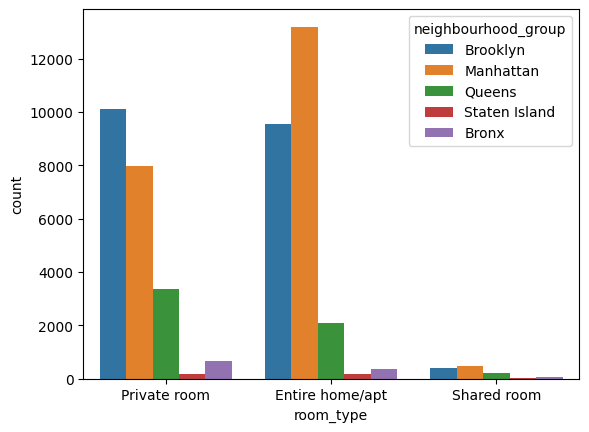

In [56]:
# Categorical - Categorical Analysis

# Create the Plot
sns.countplot(data=dfnyc, x= "room_type", hue= "neighbourhood_group")

# Show the plot
plt.show()

From the Categorical Analysis we can conclude: 

* Manhattan is the place with more places to rent, and the one with more Entire/Homes to rent
* Brooklyn is the 2nd biggest group to rent, but has more Private Rooms, meaning probably more people sharing their home or try to maximize
* Queens and Bronx are the 3rd and 4th and shares the same principle as Brookyln
* Staten has almost no expression, and it's not very prone to AirBnb


But apart from this, there's no big relationship between room type and neighbourhood

#### Categorical - Numerical Analysis


/tmp/ipykernel_1852/736580889.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfnyc[['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights',	'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr(), annot = True, fmt = ".2f")


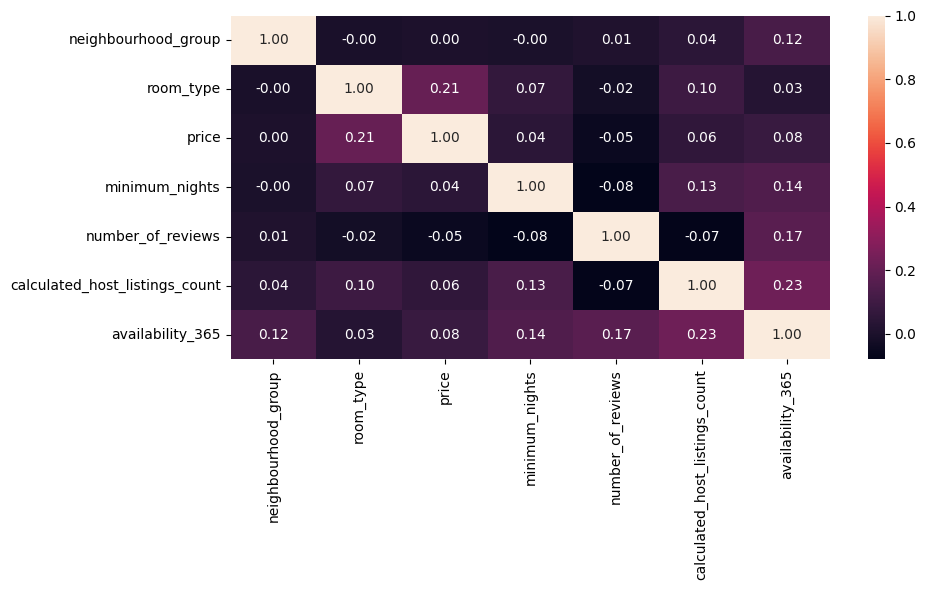

In [57]:
# Categorical - Numerical Analysis

# Factorize the Room Type and Neighbourhood Data
dfnyc['room_type'] = pd.factorize(dfnyc['room_type'])[0]
dfnyc['neighbourhood_group'] = pd.factorize(dfnyc['neighbourhood_group'])[0]

# Create a Canvas

fig, axes = plt.subplots(figsize=(10, 6))

# Create a Heatmap

sns.heatmap(dfnyc[['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights',	'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

Looking at the data here, there's very low correlation between all data. At most:

* Hosts with More Listings tend to have more Availability

Apart from this, it looks very bleak to draw in conclusion or relation

#### Analysing all the Data at Once

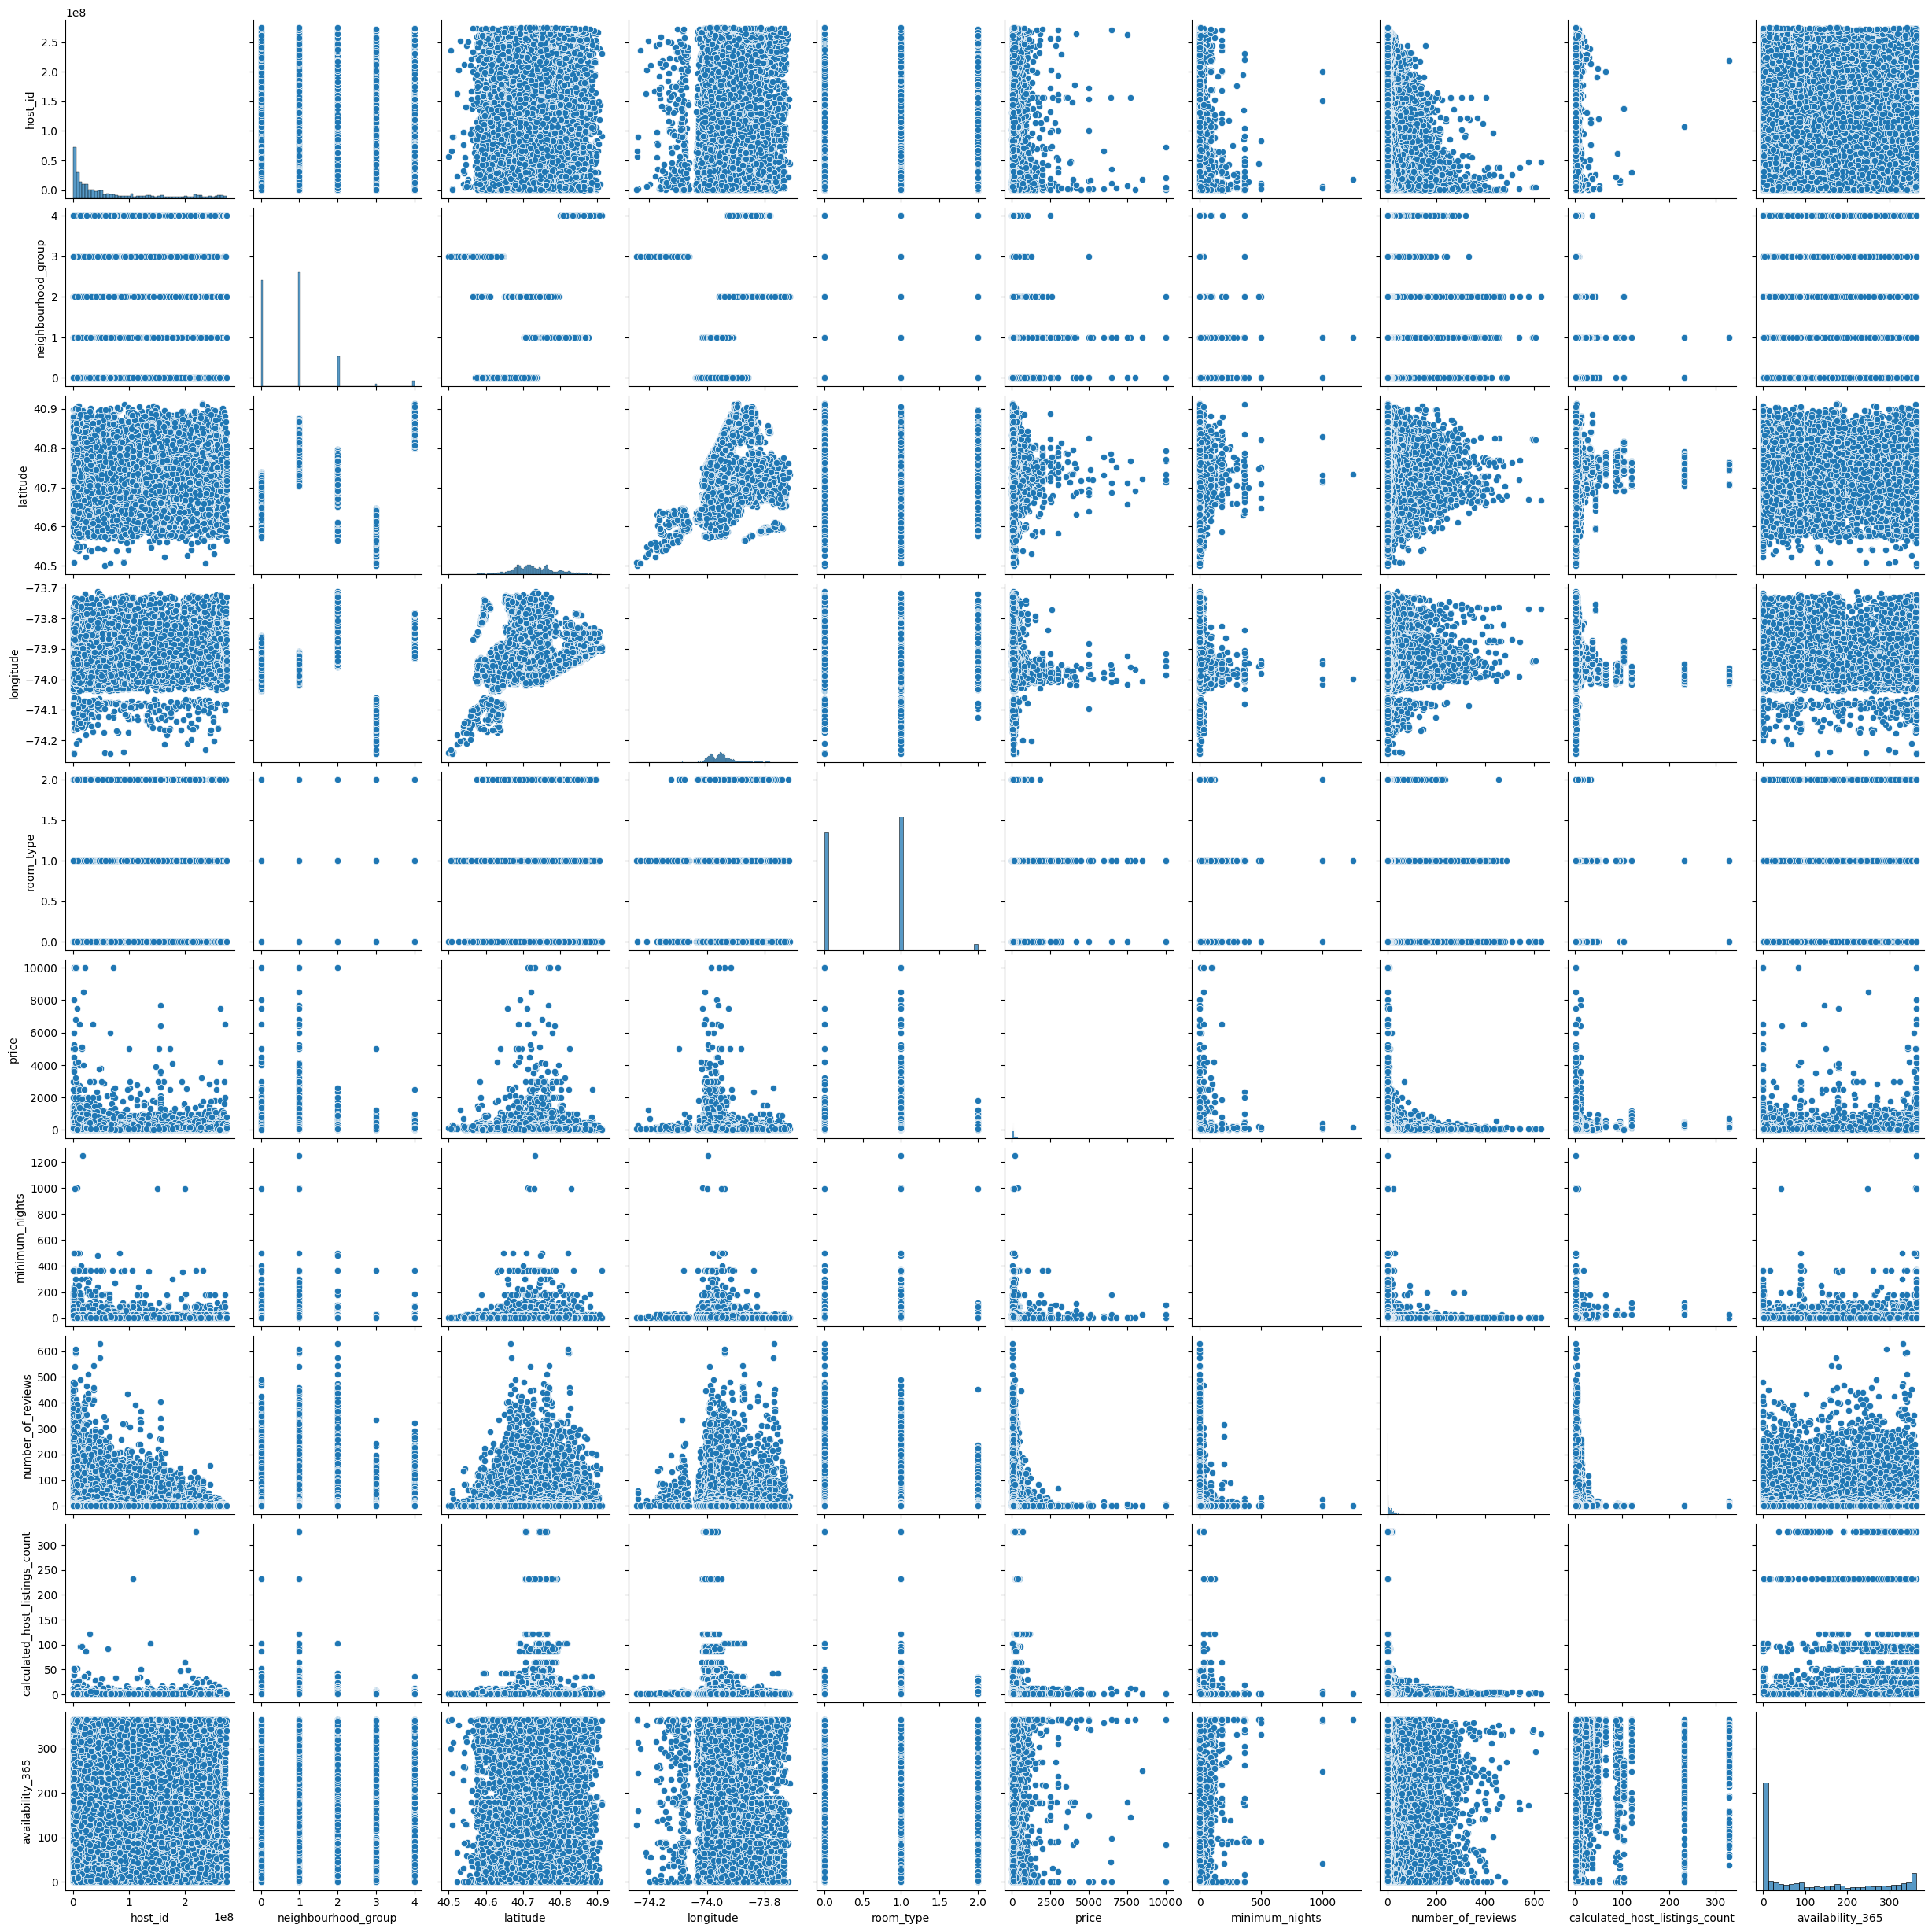

In [58]:
# Draw a Pair Plot

sns.pairplot(data = dfnyc)

### Feature Analysis


#### Outliers Detection

In [59]:
# Analyzing Outliers from the Dataframe

dfnyc.describe()

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


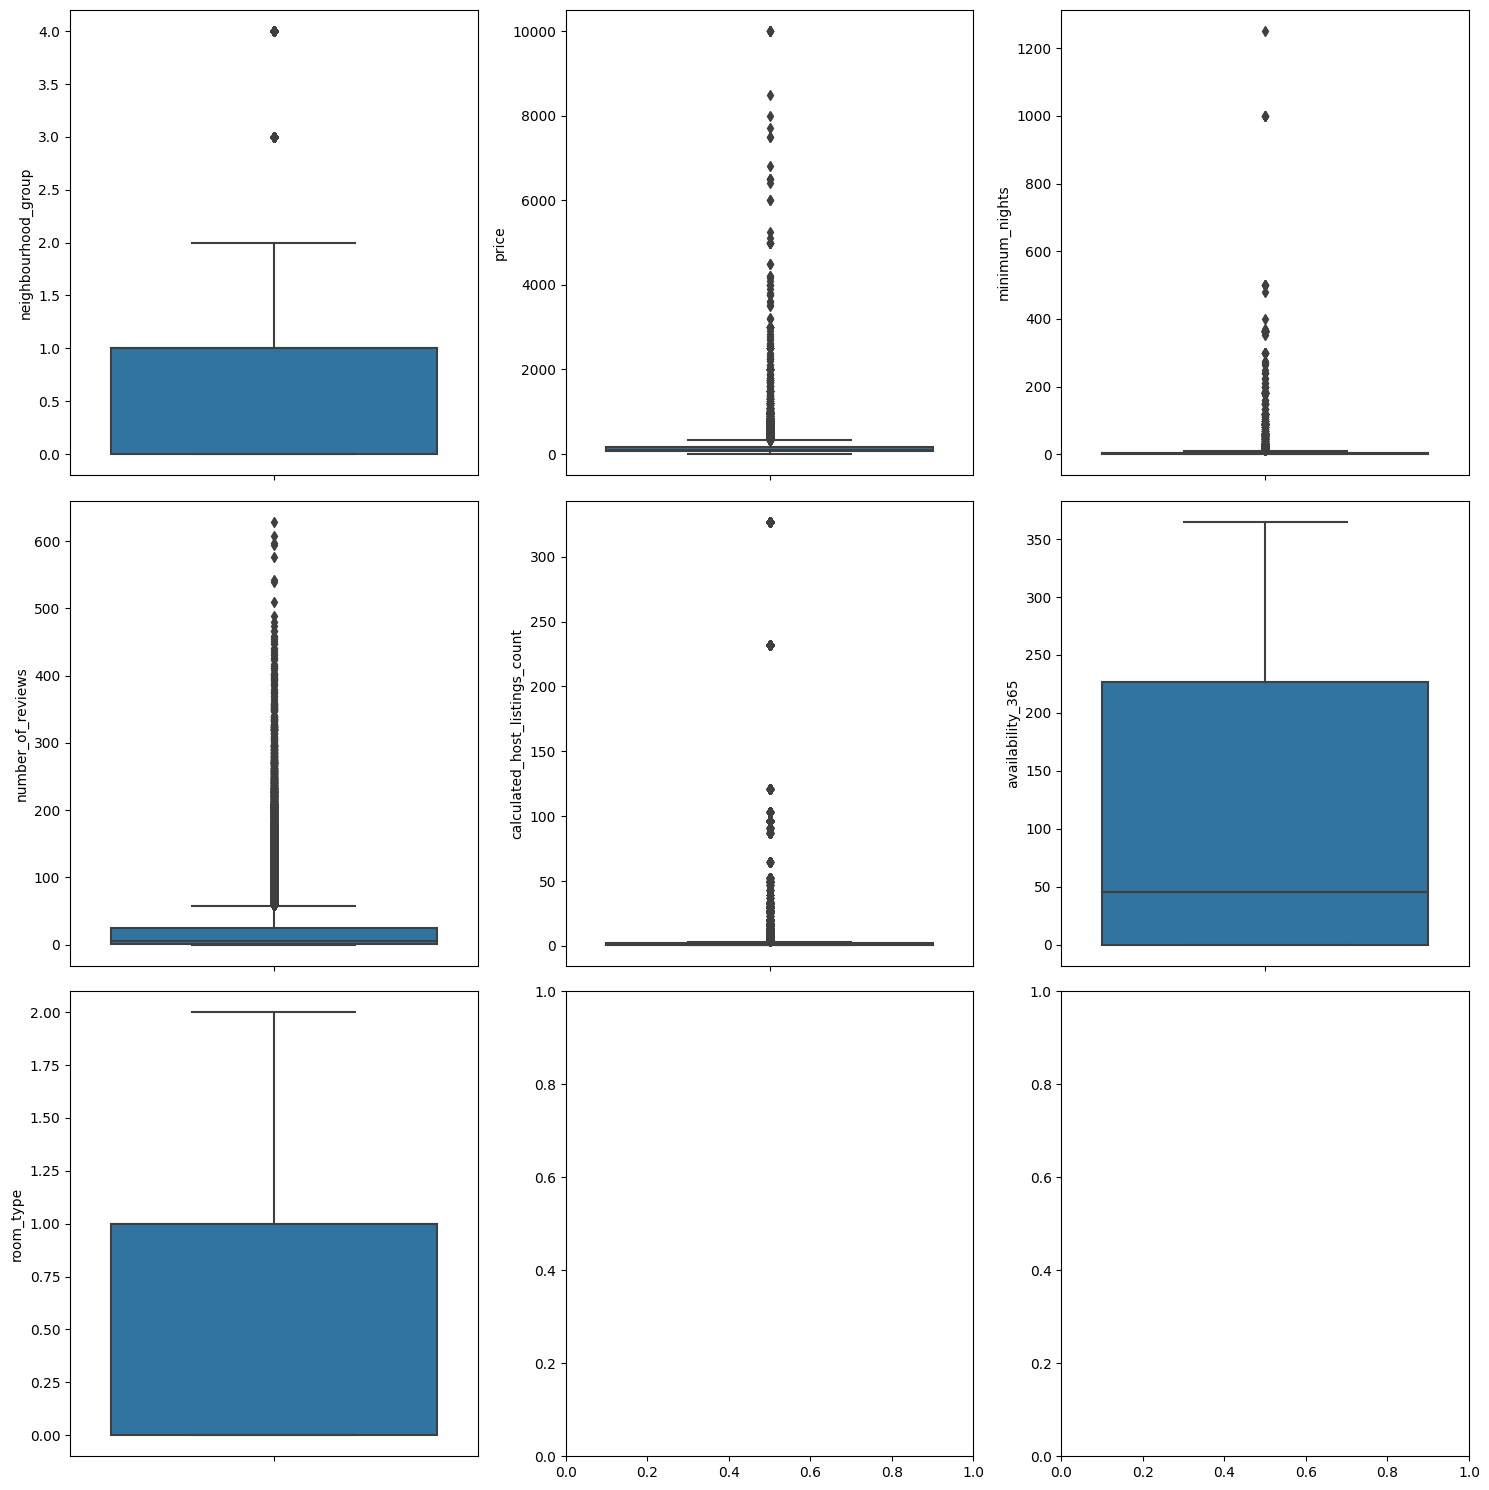

In [60]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = dfnyc, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = dfnyc, y = "price")
sns.boxplot(ax = axes[0, 2], data = dfnyc, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = dfnyc, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = dfnyc, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = dfnyc, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = dfnyc, y = "room_type")

plt.tight_layout()

plt.show()

#### Calculate the IQR

In [61]:
# Stats for Price
price_stats = dfnyc['price'].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [62]:
# IQR for Price

price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


In [63]:
# Clean the outliers

dfnyc = dfnyc[dfnyc['price'] > 0]

In [64]:
count_0 = dfnyc[dfnyc['price'] == 0].shape[0]
count_1 = dfnyc[dfnyc['price'] == 1].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)

Count of 0:  0
Count of 1:  0


In [65]:
# Stats for minimum_nights

nights_stats = dfnyc['minimum_nights'].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [66]:
# IQR for minimum_nights
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")

The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


In [67]:
# Clean the outliers

dfnyc = dfnyc[dfnyc['minimum_nights'] <= 15]

In [68]:
count_0 = dfnyc[dfnyc['minimum_nights'] == 0].shape[0]
count_1 = dfnyc[dfnyc['minimum_nights'] == 1].shape[0]
count_2 = dfnyc[dfnyc['minimum_nights'] == 2].shape[0]
count_3 = dfnyc[dfnyc['minimum_nights'] == 3].shape[0]
count_4 = dfnyc[dfnyc['minimum_nights'] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  12717
Count of 2:  11693
Count of 3:  7998
Count of 4:  3302


In [69]:
# Stats for number_of_reviews

review_stats = dfnyc['number_of_reviews'].describe()
review_stats

count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [70]:
# IQR for number_of_reviews

review_iqr = review_stats["75%"] - review_stats["25%"]

upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(review_iqr, 2)}")

The upper and lower limits for finding outliers are 66.0 and -38.0, with an interquartile range of 26.0


In [71]:
# Stats for calculated_host_listings_count

hostlist_stats = dfnyc['calculated_host_listings_count'].describe()
hostlist_stats

count    43265.000000
mean         3.369305
std         21.721688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [72]:
# IQR for calculated_host_listings_count

hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(hostlist_iqr, 2)}")

The upper and lower limits for finding outliers are 3.5 and -0.5, with an interquartile range of 1.0


In [73]:
count_04 = sum(1 for x in dfnyc['calculated_host_listings_count'] if x in range(0, 5))
count_1 = dfnyc[dfnyc['calculated_host_listings_count'] == 1].shape[0]
count_2 = dfnyc[dfnyc['calculated_host_listings_count'] == 2].shape[0]
count_2 = dfnyc[dfnyc['calculated_host_listings_count'] == 2].shape[0]

print("Count of 0: ", count_04)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

Count of 0:  40308
Count of 1:  30253
Count of 2:  6179


In [74]:
# Clean the outliers

dfnyc = dfnyc[dfnyc['calculated_host_listings_count'] > 4]

### Analysis of Missing Values

In [75]:
# Count NaN
dfnyc.isnull().sum().sort_values(ascending=False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Feature Scalling with Scikit

In [76]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(dfnyc[num_variables])
df_scal = pd.DataFrame(scal_features, index = dfnyc.index, columns = num_variables)
df_scal["price"] = dfnyc["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.016575,0.000000,0.003106,1.000000,0.0,0.0,149
21,0.239411,0.071429,0.003106,0.950685,0.0,0.0,130
22,0.071823,0.000000,0.003106,0.997260,0.0,0.0,80
23,0.130755,0.071429,0.003106,0.832877,0.0,0.0,110
92,0.029466,0.428571,0.003106,0.506849,0.0,0.0,98


#### Feature Selection of our Dataset

In [77]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type
0,0.000000,0.000000,0.846575,0.0
1,0.071429,1.000000,0.169863,0.5
2,0.071429,0.000000,1.000000,0.0
3,0.428571,0.130435,0.926027,0.0
4,0.071429,1.000000,0.778082,0.5


#### Save the clean and raw data


In [78]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("/workspaces/gustavolima-ML-template/data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("/workspaces/gustavolima-ML-template/data/processed/clean_test.csv", index=False)